🎥 Recommended Video: [K-Means Clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)


# K-Means Clustering: Organizing Data Through Intuition

Imagine you’re managing a retail store. You have a large customer base, and you want to design targeted marketing campaigns. But how do you group customers based on their behavior and preferences? This is where **K-Means Clustering** comes in. It automatically groups data into clusters based on their similarities, making it an essential tool for unsupervised learning.

---

## The Intuition Behind K-Means

K-means clustering works like organizing a messy room. Imagine you have several items scattered on the floor—you want to sort them into groups (e.g., books, clothes, gadgets). K-means follows a similar process to group data points into clusters. Here’s how it works step-by-step:

### 1. Choosing the Number of Clusters (k)
First, decide how many clusters (“k”) you want to divide your data into. For example, if you believe your customers fall into three categories (e.g., budget-conscious, mid-range, premium), you set \( k = 3 \).

### 2. Initializing Cluster Centroids
The algorithm places \( k \) centroids randomly in the feature space. These centroids act as the starting points for each cluster.

![Random centroids in a scatter plot](https://drive.google.com/uc?export=view&id=11LiLGzVDWPvl28Jer6pZuk7ev2_Jdyf5)

### 3. Assigning Points to the Nearest Centroid
Each data point is assigned to the cluster with the nearest centroid based on distance (e.g., Euclidean distance).


![Points assigned to the nearest centroid](https://drive.google.com/uc?export=view&id=14ZkUa_hqErtTisyFtDSkygWTP7ciy6zW)


### 4. Recalculating Centroids
The centroids are updated by averaging the positions of all points assigned to each cluster.


![Centroids shift to the mean of their clusters](https://drive.google.com/uc?export=view&id=161iCWERt69sWl8YWS_JCKoPE7dd_4JT5)


### 5. Iterating Until Stability
Steps 3 and 4 are repeated until the centroids stop moving significantly or a maximum number of iterations is reached. At this point, the clusters are stable.

---

## Practical Workflow

### Example:
1. Start with scattered data points (e.g., customer purchase behavior).
2. Randomly initialize centroids.
3. Assign points to clusters based on proximity.
4. Update centroids to the center of their clusters.
5. Repeat until clusters stabilize.

---

## Applications of K-Means

K-means clustering is versatile and widely used:
- **Customer Segmentation**: Grouping customers for targeted marketing.
- **Image Compression**: Reducing image size by clustering pixel colors.
- **Anomaly Detection**: Identifying unusual patterns in data.

---

## Key Concepts: Inertia and WCSS

In k-means, **inertia** (or **Within-Cluster Sum of Squares, WCSS**) measures how compact the clusters are. Lower inertia indicates tighter clusters. It’s calculated as:

$$
\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

Where:
- $( k )$: Number of clusters
- $(C_i)$: Points in cluster $( i )$
- $( mu_i)$: Centroid of cluster $( i $)

### Insights:
- As \( k \) increases, inertia decreases, but overly large \( k \) may lead to overfitting.
- The goal is to find the balance between compactness and simplicity.

---

## Choosing the Optimal Number of Clusters

### 1. **Elbow Method**
Plot inertia against \( k \). The point where inertia decreases slower (the “elbow”) indicates the optimal number of clusters.

![Elbow Method Graph](https://drive.google.com/uc?export=view&id=1llgF_8CspYzevgVWOMqXWQsoXh3ib_y9)


### 2. **Silhouette Score**
The Silhouette Score evaluates how well points fit within their clusters:
- **1**: Well-clustered.
- **0**: Ambiguous.
- **-1**: Misclassified.

It’s calculated as:
$$
\text{Silhouette Score} = \frac{(b - a)}{\max(a, b)}
$$
Where:
- \( a \): Average distance to points in the same cluster.
- \( b \): Average distance to points in the nearest other cluster.

---

## Closing Thoughts

K-means clustering is a powerful tool for finding patterns in data without supervision. By organizing data into meaningful groups, it helps uncover insights that might otherwise remain hidden. Whether you’re segmenting customers, compressing images, or detecting anomalies, k-means simplifies complexity into actionable results.




##   Example: Using k-means to segment customers on two attributes

Now let's use k-means clustering to tackle a real-world problem: segmenting customers based on customer data to identify which customers to target with a campaign for a new product or a promotion to increase their purchasing activity. The dataset is a customer-segmentation dataset available from Kaggle.com

In [ ]:
#importing files locally
import pandas as pd

customers = pd.read_csv('sample_data/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#fetching data from drive
import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1ArH8vWqMY-tjMK37xEs3-FIyrP82v7sC/view?usp=drive_link"
gdd = read_gd(url)

customers = pd.read_csv(gdd)

In [ ]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


How many rows and columns does the dataset contain?

In [ ]:
customers.shape

(200, 5)

Perform a quick check to make sure there are no missing values.

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
import matplotlib.pyplot as plt
points = customers.iloc[:, 3:5].values

print(points)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Extract the annual-income and spending-score values and plot them to see how they relate.

Text(0, 0.5, 'Spending Score')

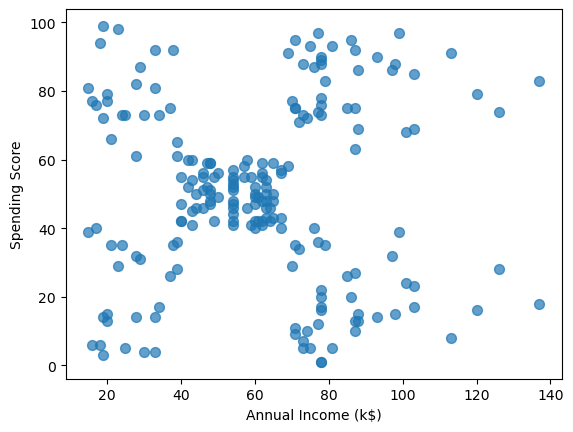

In [ ]:
import matplotlib.pyplot as plt
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

Use the elbow method to determine the optimum number of clusters.

C:\Users\nerdydreams\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

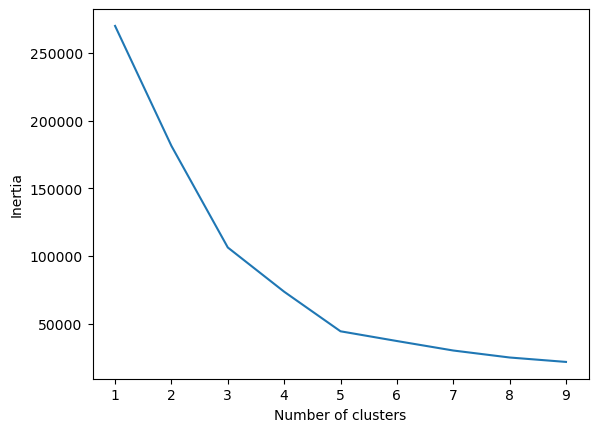

In [ ]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looks as if the optimum number of clusters is 5. Therefore, segment the customers using five clusters.

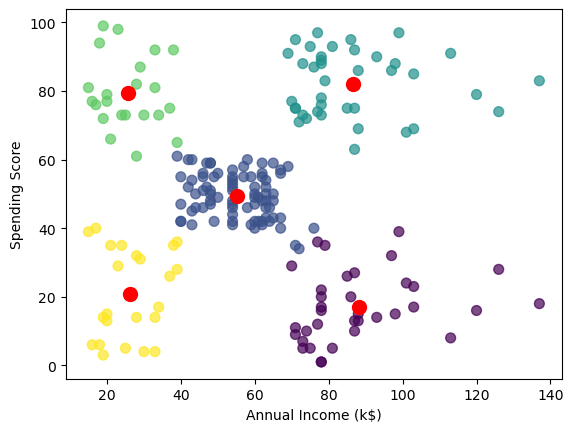

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points) # training
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

Create a DataFrame containing customer data and add a column named "Cluster" with the index of the cluster that each customer falls into.

In [ ]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


Generate a list of customers who fall into the lower-right cluster (customers with high incomes but low spending scores).

In [ ]:
import numpy as np

# Get the cluster index for a customer with a high income and low spending score
cluster = kmeans.predict(np.array([[120, 20]]))[0]

# Filter the DataFrame to include only customers in that cluster
clustered_df = df[df['Cluster'] == cluster]

# Show the customer IDs
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199], dtype=int64)

These might be great customers to target with a promotion to entice them to buy more of your product. If you were going to roll out a loyalty program instead to reward customers who already buy your product, which cluster (or clusters) would you target?

## Example 2: Segment customers on all attributes

Now segment the customers again, this time using everything except the customer IDs. Start by replacing the strings "Male" and "Female" in the "Gender" column with 1s and 0s,(*label encoding*). Remember that this is necessary because machine learning can only deal with numerical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Extract the values in the gender, age, income, and score columns, and use the elbow method to determine the optimum number of clusters based on these features.

C:\Users\nerdydreams\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

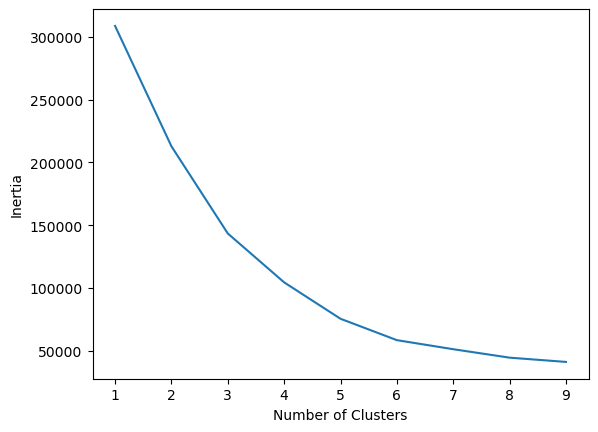

In [ ]:
inertias = []
points = df.iloc[:, 1:5].values

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

The elbow is less distinct this time, but let's segment the customers into five clusters again and add a column named "Cluster" with the index of the cluster that each customer falls into.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points) # training

df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


You have a cluster number for each customer, but what does it mean? You can’t plot gender, age, annual income, and spending score in a 2-dimensional chart the way you plotted annual income and spending score in the previous example. But you *can* get the mean (average) of these values for each cluster from the cluster centroids. Create a new DataFrame with columns for average age, average income, and so on, and then show the results.

In [ ]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1]    # Average age for current cluster
    income = center[2] # Average income for current cluster
    spend = center[3]  # Average spending score for current cluster

    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]

    results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0


Based on this, if you were going to target customers with high incomes but low spending scores for a promotion, which group of customers (which cluster) would you choose? Would it matter whether you targeted males or females?

## Silhouette Score for 2D Clustering (Annual Income and Spending Score)

In [ ]:
from sklearn.metrics import silhouette_score

# Extract the annual income and spending score
points_2d = customers.iloc[:, 3:5].values

# Calculate the Silhouette Score for 2D clustering
silhouette_avg_2d = silhouette_score(points_2d, predicted_cluster_indexes)
print(f"Silhouette Score for 2D clustering: {silhouette_avg_2d}")

Silhouette Score for 2D clustering: 0.553931997444648


### Plotting Silhouette Score for different numbers of clusters (k) (Annual Income and Spending Score)

Silhouette Score for k=2: 0.2968969162503008
Silhouette Score for k=3: 0.46761358158775435
Silhouette Score for k=4: 0.4931963109249047
Silhouette Score for k=5: 0.553931997444648
Silhouette Score for k=6: 0.5379675585622219
Silhouette Score for k=7: 0.5264283703685728
Silhouette Score for k=8: 0.45704384633565154
Silhouette Score for k=9: 0.4563032021725485
Silhouette Score for k=10: 0.4492169169017592


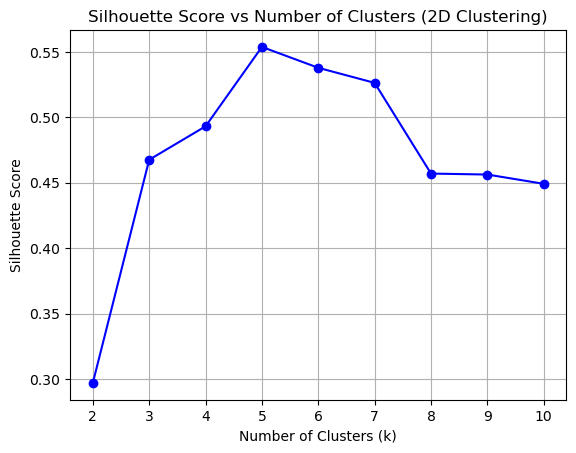

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the 2D features (Annual Income and Spending Score)
points_2d = customers.iloc[:, 3:5].values  # Adjust this based on your dataset

# Initialize a list to store Silhouette Scores
silhouette_scores_2d = []

# Range of clusters to try (e.g., from 2 to 10)
k_range = range(2, 11)

# Calculate Silhouette Score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(points_2d)
    silhouette_avg = silhouette_score(points_2d, cluster_labels)
    silhouette_scores_2d.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

# Plot the Silhouette Scores
plt.plot(k_range, silhouette_scores_2d, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (2D Clustering)')
plt.grid(True)
plt.show()

## Silhouette Score for 4D Clustering (Gender, Age, Annual Income, and Spending Score)

In [ ]:
# Extract the gender, age, annual income, and spending score
points_4d = df.iloc[:, 1:5].values

# Predict the cluster indexes for 4D clustering
predicted_cluster_indexes_4d = kmeans.predict(points_4d)

# Calculate the Silhouette Score for 4D clustering
silhouette_avg_4d = silhouette_score(points_4d, predicted_cluster_indexes_4d)
print(f"Silhouette Score for 4D clustering: {silhouette_avg_4d}")

Silhouette Score for 4D clustering: 0.3786785930395736


### Plotting Silhouette Score for different numbers of clusters (k) (Gender, Age, Annual Income, and Spending)

Silhouette Score for k=2: 0.29307334005502633
Silhouette Score for k=3: 0.383798873822341
Silhouette Score for k=4: 0.4052954330641215
Silhouette Score for k=5: 0.4440669204743008
Silhouette Score for k=6: 0.45205475380756527
Silhouette Score for k=7: 0.44096462877395787
Silhouette Score for k=8: 0.4277721345758326
Silhouette Score for k=9: 0.4009199511597155


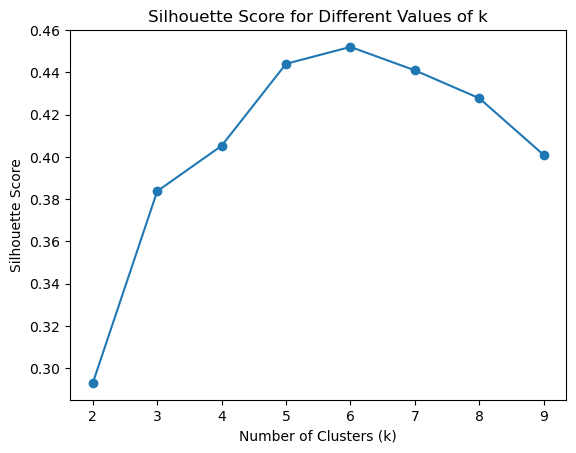

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(points_4d)
    score = silhouette_score(points_4d, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# Plot the Silhouette Scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()